In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# Load the data (delimited by semicolons)
data = pd.read_csv('data/raw_data.csv', delimiter=';')

# Display the first 5 rows
print(data.head())

# Save data delimited by commas
# data.to_csv('data/data.csv', sep=',', index=False)

'''
OUTPUT:
                   Time  PV_Power  T_air  G_h  G_tilt   W_s    W_d
0  01-Jan-2017 00:00:00       NaN   0.74  0.0     0.0  0.30  296.4
1  01-Jan-2017 00:01:00       NaN   0.67  0.0     0.0  0.47  269.2
2  01-Jan-2017 00:02:00       NaN   0.57  0.0     0.0  0.84  265.3
3  01-Jan-2017 00:03:00       NaN   0.53  0.0     0.0  0.63  275.4
4  01-Jan-2017 00:04:00       NaN   0.53  0.0     0.0  0.58  265.3
'''

                   Time  PV_Power  T_air  G_h  G_tilt   W_s    W_d
0  01-Jan-2017 00:00:00       NaN   0.74  0.0     0.0  0.30  296.4
1  01-Jan-2017 00:01:00       NaN   0.67  0.0     0.0  0.47  269.2
2  01-Jan-2017 00:02:00       NaN   0.57  0.0     0.0  0.84  265.3
3  01-Jan-2017 00:03:00       NaN   0.53  0.0     0.0  0.63  275.4
4  01-Jan-2017 00:04:00       NaN   0.53  0.0     0.0  0.58  265.3


'\nOUTPUT:\n                   Time  PV_Power  T_air  G_h  G_tilt   W_s    W_d\n0  01-Jan-2017 00:00:00       NaN   0.74  0.0     0.0  0.30  296.4\n1  01-Jan-2017 00:01:00       NaN   0.67  0.0     0.0  0.47  269.2\n2  01-Jan-2017 00:02:00       NaN   0.57  0.0     0.0  0.84  265.3\n3  01-Jan-2017 00:03:00       NaN   0.53  0.0     0.0  0.63  275.4\n4  01-Jan-2017 00:04:00       NaN   0.53  0.0     0.0  0.58  265.3\n'

In [41]:
# Print General information about the data
print(data.info())

'''
OUTPUT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      525601 non-null  object 
 1   PV_Power  198730 non-null  float64
 2   T_air     520747 non-null  float64
 3   G_h       520747 non-null  float64
 4   G_tilt    520747 non-null  float64
 5   W_s       520747 non-null  float64
 6   W_d       520747 non-null  float64
dtypes: float64(6), object(1)
memory usage: 28.1+ MB
None
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      525601 non-null  object 
 1   PV_Power  198730 non-null  float64
 2   T_air     520747 non-null  float64
 3   G_h       520747 non-null  float64
 4   G_tilt    520747 non-null  float64
 5   W_s       520747 non-null  float64
 6   W_d       520747 non-null  float64
dtypes: float64(6), object(1)
memory usage: 28.1+ MB
None


"\nOUTPUT:\n<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 525601 entries, 0 to 525600\nData columns (total 7 columns):\n #   Column    Non-Null Count   Dtype  \n---  ------    --------------   -----  \n 0   Time      525601 non-null  object \n 1   PV_Power  198730 non-null  float64\n 2   T_air     520747 non-null  float64\n 3   G_h       520747 non-null  float64\n 4   G_tilt    520747 non-null  float64\n 5   W_s       520747 non-null  float64\n 6   W_d       520747 non-null  float64\ndtypes: float64(6), object(1)\nmemory usage: 28.1+ MB\nNone\n"

In [42]:
# Print the number of missing values in each column
print(data.isnull().sum())

'''
OUTPUT:
Time             0
PV_Power    326871
T_air         4854
G_h           4854
G_tilt        4854
W_s           4854
W_d           4854
dtype: int64
'''

Time             0
PV_Power    326871
T_air         4854
G_h           4854
G_tilt        4854
W_s           4854
W_d           4854
dtype: int64


'\nOUTPUT:\nTime             0\nPV_Power    326871\nT_air         4854\nG_h           4854\nG_tilt        4854\nW_s           4854\nW_d           4854\ndtype: int64\n'

## Inference
- More than half of the rows have Missing values in PV_Power column

In [43]:
# Create new column Day, Month, and Year
data['Time'] = pd.to_datetime(data['Time'])
data['Day'] = data['Time'].dt.day
data['Month'] = data['Time'].dt.month
data['Year'] = data['Time'].dt.year



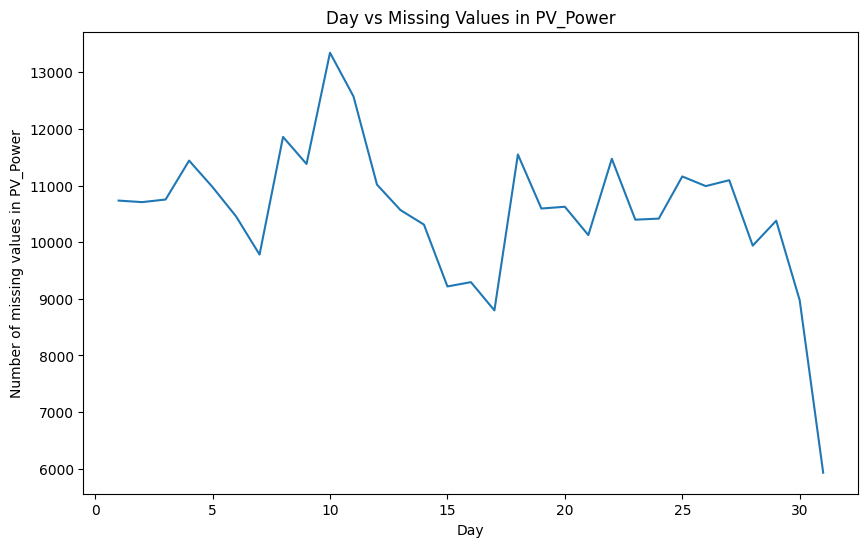

In [44]:

# Calculate the number of missing values in PV_Power for each day
missing_values_by_day = data['PV_Power'].isna().groupby(data['Day']).sum()

# Now plot Day vs Missing Values in PV_Power
plt.figure(figsize=(10, 6))
plt.plot(missing_values_by_day)
plt.xlabel('Day')
plt.ylabel('Number of missing values in PV_Power')
plt.title('Day vs Missing Values in PV_Power')
plt.show()

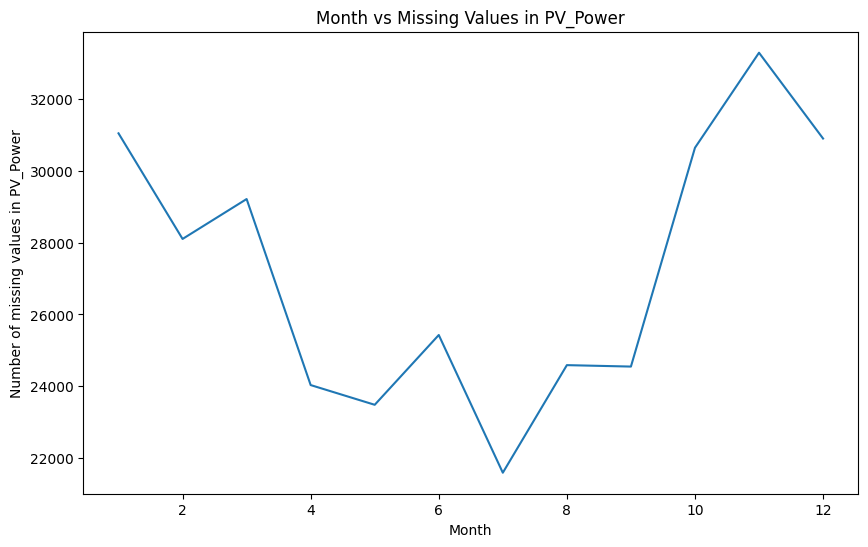

In [45]:
# Now plot Month vs Missing Values in PV_Power
missing_values_by_month = data['PV_Power'].isna().groupby(data['Month']).sum()
plt.figure(figsize=(10, 6))
plt.plot(missing_values_by_month)
plt.xlabel('Month')
plt.ylabel('Number of missing values in PV_Power')
plt.title('Month vs Missing Values in PV_Power')
plt.show()

## Inference
- Jan, Oct, and Nov have the highest missing values
- There are significant no. of missing values in all months nonetheless

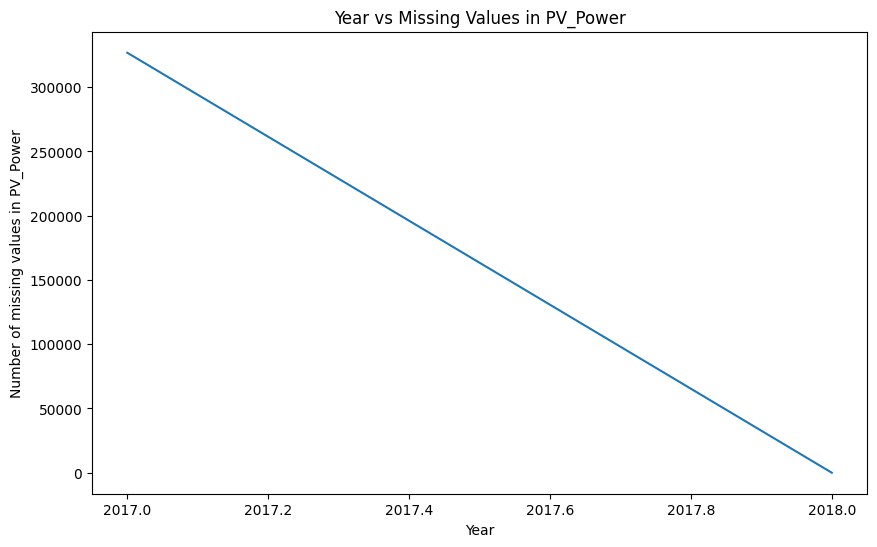

In [46]:
# Now plot Year vs Missing Values in PV_Power
missing_values_by_year = data['PV_Power'].isna().groupby(data['Year']).sum()
plt.figure(figsize=(10, 6))
plt.plot(missing_values_by_year)
plt.xlabel('Year')
plt.ylabel('Number of missing values in PV_Power')
plt.title('Year vs Missing Values in PV_Power')
plt.show()

# Data only belongs to 2017

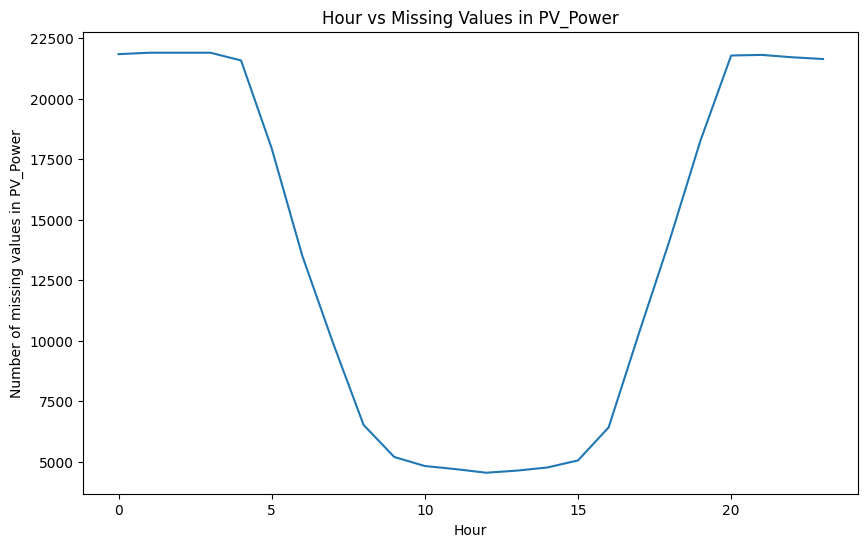

In [47]:
# Plot hour of the day vs. Missing values in PV_Power
data['Hour'] = data['Time'].dt.hour
missing_values_by_hour = data['PV_Power'].isna().groupby(data['Hour']).sum()
plt.figure(figsize=(10, 6))
plt.plot(missing_values_by_hour)
plt.xlabel('Hour')
plt.ylabel('Number of missing values in PV_Power')
plt.title('Hour vs Missing Values in PV_Power')
plt.show()

# Missing values when there is no sunlight

## Inference
- NaN values in PV power are correlating with lack of sunlight (ie. happening outside of peak sunlight hours)

## Conclusion
- We think it is safe to throw out all rows containing NaN values since we plan on excluding data points outside peak sunlight hours later anyway.
- No. of Missing values in other columns is insignificant enough to throw away those rows as well.
- Will revisit this decision in the future when we have more time

In [48]:
# Drop all rows containing missing values
data = data.dropna()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 198673 entries, 3365 to 525150
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Time      198673 non-null  datetime64[ns]
 1   PV_Power  198673 non-null  float64       
 2   T_air     198673 non-null  float64       
 3   G_h       198673 non-null  float64       
 4   G_tilt    198673 non-null  float64       
 5   W_s       198673 non-null  float64       
 6   W_d       198673 non-null  float64       
 7   Day       198673 non-null  int32         
 8   Month     198673 non-null  int32         
 9   Year      198673 non-null  int32         
 10  Hour      198673 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(4)
memory usage: 15.2 MB
None


In [49]:
print(data.isna().sum())

Time        0
PV_Power    0
T_air       0
G_h         0
G_tilt      0
W_s         0
W_d         0
Day         0
Month       0
Year        0
Hour        0
dtype: int64


In [50]:
print(data.head())
print(data.tail())

                    Time  PV_Power  T_air  G_h  G_tilt   W_s    W_d  Day  \
3365 2017-01-03 08:05:00  0.862305   0.63  2.0     3.0  0.25  318.8    3   
3366 2017-01-03 08:06:00  0.862305   0.73  2.0     4.0  0.00  309.3    3   
3367 2017-01-03 08:07:00  0.844879   0.88  3.0     4.0  0.30  330.1    3   
3371 2017-01-03 08:11:00  0.844879   0.03  7.0     9.0  1.11   11.8    3   
3372 2017-01-03 08:12:00  0.844879  -0.39  7.0    11.0  0.84   24.1    3   

      Month  Year  Hour  
3365      1  2017     8  
3366      1  2017     8  
3367      1  2017     8  
3371      1  2017     8  
3372      1  2017     8  
                      Time  PV_Power  T_air  G_h  G_tilt   W_s    W_d  Day  \
525142 2017-12-31 16:22:00  0.808884   5.17  6.0     5.0  0.63  158.9   31   
525145 2017-12-31 16:25:00  0.808884   5.22  6.0     5.0  0.90  126.6   31   
525146 2017-12-31 16:26:00  0.808884   5.12  6.0     5.0  1.11  158.2   31   
525147 2017-12-31 16:27:00  0.771072   5.20  5.0     5.0  0.79  171.2   31 

In [51]:
# Making data more suitable for training ML models

# New column Minute
data['Minute'] = data['Time'].dt.minute

# Drop Time column
data = data.drop('Time', axis=1)

# Reorder columns
data = data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'T_air', 'G_h', 'G_tilt', 'W_s', 'W_d', 'PV_Power']]
print(data.head())

      Year  Month  Day  Hour  Minute  T_air  G_h  G_tilt   W_s    W_d  \
3365  2017      1    3     8       5   0.63  2.0     3.0  0.25  318.8   
3366  2017      1    3     8       6   0.73  2.0     4.0  0.00  309.3   
3367  2017      1    3     8       7   0.88  3.0     4.0  0.30  330.1   
3371  2017      1    3     8      11   0.03  7.0     9.0  1.11   11.8   
3372  2017      1    3     8      12  -0.39  7.0    11.0  0.84   24.1   

      PV_Power  
3365  0.862305  
3366  0.862305  
3367  0.844879  
3371  0.844879  
3372  0.844879  


# Outliers

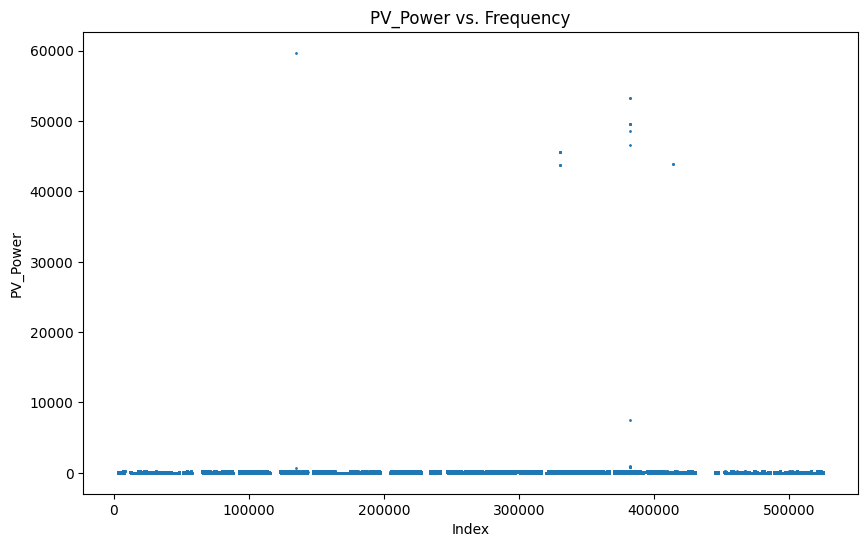

In [52]:
# Outlier Detection and Removal (PV_Power)

# Plot PV_Power value vs. Frequency Scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['PV_Power'], s=1)
plt.xlabel('Index')
plt.ylabel('PV_Power')
plt.title('PV_Power vs. Frequency')
plt.show()

## Inference
- The Outliers in PV_Power need to be removed in order to Normalize our Data properly

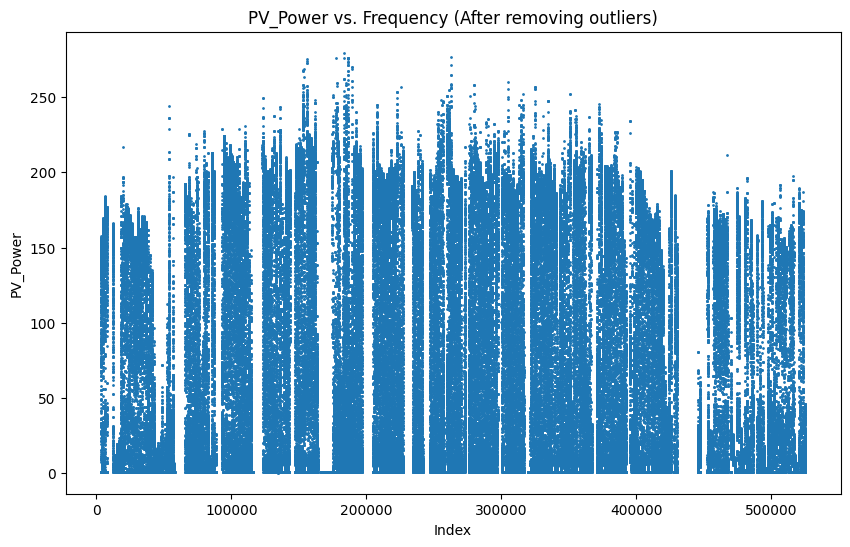

In [53]:
# Remove outliers using Z-score
from scipy.stats import zscore

z_scores = zscore(data['PV_Power'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1)
data = data[filtered_entries]

# Plot PV_Power value vs. Frequency Scatter plot after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['PV_Power'], s=1)
plt.xlabel('Index')
plt.ylabel('PV_Power')
plt.title('PV_Power vs. Frequency (After removing outliers)')
plt.show()

In [54]:
# The data belongs to a single plant. So, let's normalize PV_Power column (by creating a new column called "Utilization")

# Find absolute maximum value of PV_Power
max_value = data['PV_Power'].abs().max()

# Normalize PV_Power
data['Utilization'] = data['PV_Power'] / max_value

print(data.head())

      Year  Month  Day  Hour  Minute  T_air  G_h  G_tilt   W_s    W_d  \
3365  2017      1    3     8       5   0.63  2.0     3.0  0.25  318.8   
3366  2017      1    3     8       6   0.73  2.0     4.0  0.00  309.3   
3367  2017      1    3     8       7   0.88  3.0     4.0  0.30  330.1   
3371  2017      1    3     8      11   0.03  7.0     9.0  1.11   11.8   
3372  2017      1    3     8      12  -0.39  7.0    11.0  0.84   24.1   

      PV_Power  Utilization  
3365  0.862305     0.003085  
3366  0.862305     0.003085  
3367  0.844879     0.003023  
3371  0.844879     0.003023  
3372  0.844879     0.003023  


In [55]:
# Save the data
data.to_csv('data/data.csv', index=False)